## Book Rating Prediction Using a Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####  IMPORT BOOKS DATA FROM CSV FILE

In [ ]:
books_df = pd.read_csv(r"Books.csv",sep=",",index_col="bookID")

### 1.  Feature Engineering 

In [ ]:
 # View the books dataset to see is loaded correctly
books_df.head()

In [ ]:
# Basic statistical analysis on the dataset
# The number of records in the dataset is 11,127
books_df.describe()

In [ ]:
# Identify the datatypes for the columns
books_df.dtypes

In [ ]:
# Check for null values
books_df.isna().sum()

## ISBN stands for International Standard Book Number. It is a unique numeric identifier assigned to each edition and variation of a book.

### ISBN-10: The original ISBN format, consisting of 10 digits. It was used before 2007.
### ISBN-13: The newer ISBN format, consisting of 13 digits. It was introduced in 2007 to increase the capacity of the ISBN system and is now the standard format.

In [ ]:
# Drop the columns isbn and isbn13, because it has no impact on the target variable "Average rating"
books_df = books_df.drop(["isbn","isbn13"],axis=1)

#####  Cleaning the column "language_code" 

In [ ]:
# select null values for language_code
books_df.loc[books_df.language_code.isna(),:]

In [ ]:
# Replace the null values with the language code "eng", I choose "eng" because the "title" of the books are in english and the Authors as well .
books_df.loc[books_df.language_code.isna(),"language_code"] = "eng"

In [ ]:
# find distinct values for language_code, and whenever there are different codes with the same meanining we merge to become one.
books_df.language_code.value_counts()

In [ ]:
# Merge the Language codes: en-US, en-GB,en-CA to eng
# select the language_code as series and then convert it into a Set
list_of_lang = set(books_df["language_code"])
list_of_lang

In [ ]:
# Create a uniformity in the columm 'language_code' by looping through the list
for i in list_of_lang:
    if i == "English":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "eng"
    elif i == "en-US":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "eng"  
    elif i == "en-GB":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "eng"
    elif i == "en-CA":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "eng"
    elif i == "French":
        books_df.loc[books_df['language_code'] == i,"language_code"] = "fre"

In [ ]:
# View the distinct values for language_code after merging identical Language code
books_df.language_code.value_counts()

#####  Cleaning the column "publication_date"

In [ ]:
# view null values for publication date
books_df.loc[books_df.publication_date.isna(),:]

In [ ]:
# Identify records with the same title but with not null publication date. To replace the null date. 
books_df[books_df['title'].str.contains('Montaillou', na=False)]

In [ ]:
# Number of DataFrame rows and columns (including NA elements)
books_df.shape

In [ ]:
# only one record for the title with null publication date.It can therefore be dropped
# Remove the records that have publication_date null
books_df = books_df.loc[books_df['publication_date'].notna(),:]

In [ ]:
# Clean incorrect date value 
books_df.loc[books_df['publication_date']=="1/1/1900 0:00","publication_date"]

In [ ]:
# Convert object/string to date type
books_df.loc[:,"Date"] = pd.to_datetime(books_df['publication_date'])

In [ ]:
# Select year from the date
books_df['year'] = books_df['Date'].dt.year


In [ ]:
# Select month from the date
books_df['month'] = books_df['Date'].dt.month

In [ ]:
# View the dataframe after data cleaning
books_df.head()

In [ ]:
# View the data types
books_df.dtypes

In [ ]:
# Drop the columns "publication_date" and "Date", because it has been transformed to year and month 
books_df = books_df.drop(["publication_date","Date"],axis=1)

#####  Cleaning the column "Authors"

In [ ]:
# Create a function to identify "/,C" in the column "Authors"
def Update_strings(name):
    if name.find("/") != -1:
      author_name = name.split("/")[0]
    elif name.find("(") != -1:
      author_name = name.split("(")[0]  
    else:
      author_name = name
    return author_name
   

In [ ]:
# Transform the "author" column information to have only one author by picking the first name before the '/' or '('
books_df.loc[:,"authors"] = books_df.loc[:,"authors"].apply(Update_strings)

#####  Cleaning the column "Title"

In [ ]:
# Create function to replace special characters such as "!$%^&*" with white space and also '&' with and
def processString(txt):
  specialCharacters = "!$%^&*¡¿" 
  for specialChar in specialCharacters:
    if specialChar == '&':
        txt = txt.replace('&',' and ') 
    else:
        txt = txt.replace(specialChar, ' ')
  return txt

In [ ]:
# Update the title column data to bring uniformity to the column "title"
# Replace double white spaces with single white space
books_df.loc[:,"New_title"]= books_df.loc[:,"title"].apply(processString)
books_df['New_title'] = books_df['New_title'].str.replace('  ',' ')

# Create a new title column name: new_title to pick the first name of the title
books_df.loc[:,"New_title"]= books_df.loc[:,"New_title"].apply(Update_strings)

In [ ]:
# View the "title" transformation
books_df[["title","New_title"]]

In [ ]:
# The number of counts for each title
books_df.title.value_counts()

In [ ]:
# Check for null values
books_df.isna().sum()

##### Clean the column "publisher" 

In [ ]:
# View null values of publisher,text_reviews_count 
books_df.loc[books_df.publisher.isna(),:]

In [ ]:
# Drop records for null values of "text_reviews_count" and "publisher"
books_df = books_df.loc[books_df['text_reviews_count'].notna(),:]

In [ ]:
# Drop the columns publisher from the dataframe
books_df = books_df.drop(["publisher"],axis=1)


In [ ]:
# View the data types for the columns
books_df.dtypes

In [ ]:
# Replace the "title" column with "new_title" and drop the colum
books_df.loc[:,"title"]= books_df.loc[:,"New_title"].apply(Update_strings)
books_df = books_df.drop(["New_title"],axis=1)
books_df

#### 2. Exploratory Analysis of the Data

In [ ]:
# Ratings distribution
sns.kdeplot(books_df['average_rating'], fill=True) # Replace shade with fill
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show() # This will display the plot


In [ ]:
# Top 10 Counts average ratings
sns.barplot(x=books_df['average_rating'].value_counts().head(10).index,y=books_df['average_rating'].value_counts().head(10))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)

### Top 4 Languages

In [ ]:
books_df['language_code'].value_counts().head(4).plot(kind = 'pie', autopct='%1.2f%%', figsize=(5, 5)).legend()


In [ ]:
# Find mean(average_rating) from dataframe books_df with group by "title" 
title_avg_rat_df = books_df.groupby(["title"])["average_rating"].mean()
# Convert the groupby result into a dataframe
title_df = title_avg_rat_df.to_frame().reset_index()
# Order by title and average_rating
title_df.sort_values(["average_rating","title"],ascending=[False,True]).head(10)

In [ ]:
# Sketch the table above in an histogram
title_top_rating = title_df.nlargest(10, ['average_rating']).set_index('title')['average_rating']
sns.barplot(x=title_top_rating, y=title_top_rating.index)

### Top 5 Authors

In [ ]:
authors = books_df.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(y=authors['ratings_count'], x=authors.index, errorbar=None, hue=authors['title']) 
plt.xlabel('Total Ratings')

In [ ]:
# Visualize the relationship between Average_rating and num_pages with respect to the language code
df_lang=books_df.loc[(books_df['language_code'] == 'eng') | (books_df['language_code'] == 'fre') | (books_df['language_code'] == 'spa') | (books_df['language_code'] == 'ger')]

sns.lmplot(x="average_rating", y="ratings_count",hue = "language_code",data=df_lang);

#### 3. Model Training and Evaluation

##### Transforming categorical data to numeric

In [ ]:
# Remove titles that are non ASCII characters
books_df = books_df.loc[~((books_df['title'].str.contains(r'[^\x00-\x7F]')) & ((books_df['language_code'] == 'jpn') | (books_df['language_code'] == 'zho')))]

In [ ]:
# Select the top 4 counts for "language_code"
df_processed = books_df.loc[(books_df['language_code'] == 'eng') | (books_df['language_code'] == 'fre') | (books_df['language_code'] == 'spa') | (books_df['language_code'] == 'ger')]

In [ ]:
# this is a way to explicit the "language_code" column by transforming it to 4 columns corresponding to each of its values
# this is known as encoding
df_processed = pd.concat([df_processed,pd.get_dummies(df_processed.language_code)],axis=1).drop(columns="language_code")

In [ ]:
# View the dataframe to be used for machine learning
# It has 10996 records and 12 columns
df_processed

In [ ]:
# convert 'title' column to numeric
df_processed['title'] = pd.factorize(df_processed['title'])[0]

In [ ]:
# convert 'authors' column to numeric
df_processed['authors'] = pd.factorize(df_processed['authors'])[0]

In [ ]:
# View the dataframe again now all columns are numeric which is good for the model to be trained.
df_processed

In [ ]:
# Copy the datafram to csv
df_processed.to_csv('book_processed_cleaned.csv', index=False)
books_df.to_csv('books_df_cleaned.csv', index=False)

#####  Split the data into Train and Test 

In [ ]:
# Split the data into train and test for the model
from sklearn.model_selection import train_test_split 

In [ ]:
# the size of the test is 20% and the train is 80%
df_train, df_test = train_test_split(df_processed,test_size = 0.2)

In [ ]:
# Total records for dataset
len(df_processed)

In [ ]:
# Total records for training the model
len(df_train)

In [ ]:
# Total records for testing the model
len(df_test)

In [ ]:
# Check the data is ramdomly selected
print(df_processed.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

In [ ]:
# Review the features and the target to be used for the machine learning
df_train.columns

In [ ]:
#get the values of the columns for the training data
X_train = df_train.loc[:,['title', 'authors', 'num_pages', 'ratings_count', 'text_reviews_count','year','month','eng','fre','ger','spa']].values
y_train = df_train.average_rating.values.round(1)

In [ ]:
print(X_train)

In [ ]:
print(y_train)

In [ ]:
# get the values of the columns for the test data
X_test = df_test.loc[:,['title', 'authors', 'num_pages', 'ratings_count', 'text_reviews_count','year','month','eng','fre','ger','spa']].values
y_test = df_test.average_rating.values.round(1)

In [ ]:
# View the values for X_test
print(X_test)

In [ ]:
# View the values y_test
print(y_test)

##### Training the Model

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
# creating an object of LinearRegression class
lr_model = LinearRegression()
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

##### Predict the Target Values

In [81]:
y_test_predicted = lr_model.predict(X_test)

In [82]:
# Approximate to 1 decimal place
y_test_predicted = y_test_predicted.round(1)

In [83]:
# Now compare the actual output values for y_test with the predicted values.
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.2,4.2
1,4.0,3.9
2,3.8,3.7
3,4.1,4.1
4,3.7,3.6
5,3.9,3.8
6,4.0,4.0
7,4.2,4.3
8,3.5,3.5
9,3.9,3.8


##### Evalute the Performance of the Model

In [84]:
# Check how accurate is the prediction
(y_test_predicted == y_test).sum()/len(y_test)

0.4772727272727273

In [85]:
# Compute the accuracy of the model
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [86]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted)
meanError = mean_squared_error(y_test,y_test_predicted)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted))

In [87]:
print('R-square is',score)
print('mean_squard_error is',meanError)
print('root_mean_squared error is',meansquardError)

R-square is 0.6469841174283343
mean_squard_error is 0.04826818181818181
root_mean_squared error is 0.2197002089625356


In [88]:
print('Intercept: \n', lr_model.intercept_)

Intercept: 
 3.5587853890771934


In [89]:
print('Coefficients: \n', lr_model.coef_)

Coefficients: 
 [-9.47235403e-05 -1.63383889e-05  1.06736382e-05 -8.89977230e-09
  9.92816101e-07  4.40943330e-04  5.37063621e-04 -1.38852855e-02
  2.65745491e-05  1.77900161e-02 -3.93130522e-03]


##### Compare the Model with random forest regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [91]:
rf_model = RandomForestRegressor()

In [92]:
rf_model.fit(X=X_train,y=y_train)

RandomForestRegressor()

In [93]:
y_test_predicted_rf = rf_model.predict(X_test)

In [94]:
# Approximate to 1 decimal place
y_test_predicted_rf = y_test_predicted_rf.round(1)

In [95]:
# Now compare the actual output values for y_test with the predicted values.
preds = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted_rf.tolist()}).head(25)
preds.head(10)

,Actual,Predicted
0,4.2,4.2
1,4.0,4.0
2,3.8,3.8
3,4.1,4.1
4,3.7,3.7
5,3.9,3.9
6,4.0,4.0
7,4.2,4.2
8,3.5,3.5
9,3.9,3.9


In [96]:
# Check how accurate is the prediction
(y_test_predicted_rf == y_test).sum()/len(y_test)

0.98

In [97]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted_rf)
meanError = mean_squared_error(y_test,y_test_predicted_rf)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted_rf))

In [98]:
print('R-square is',score)
print('mean_sqrd_error is',meanError)
print('root_mean_squared error is',meansquardError)

R-square is 0.9926863646138274
mean_sqrd_error is 0.0010000000000000005
root_mean_squared error is 0.0316227766016838


### Support Vector Machine

In [99]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train,y_train)

SVR()

In [100]:
y_test_predicted_svr = svr_model.predict(X_test)

In [ ]:
# Approximate to 1 decimal place
y_test_predicted_svr = y_test_predicted_svr.round(1)

In [ ]:
# Now compare the actual output values for y_test with the predicted values.
preds = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_test_predicted_svr.tolist()}).head(25)
preds.head(10)

In [ ]:
# Check how accurate is the prediction
(y_test_predicted_svr == y_test).sum()/len(y_test)

In [ ]:
# Evalute the performance of the Algorithm
score=r2_score(y_test,y_test_predicted_svr)
meanError = mean_squared_error(y_test,y_test_predicted_svr)
meansquardError = np.sqrt(mean_squared_error(y_test,y_test_predicted_svr))

In [ ]:
# Print the evaluation metrics
print('R-square is',score)
print('mean_sqrd_error is',meanError)
print('root_mean_squared error is',meansquardError)

Text(0.5, 1.0, 'Actual vs Predicted')

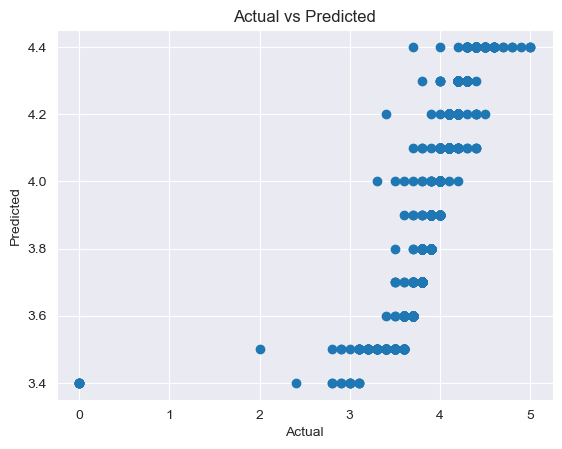

In [108]:
# Print Graph of the actual and predicted values
plt.scatter(y_test,y_test_predicted_svr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


# Conclusion

The evaluation metrics reveal a substantial difference in performance between the Random Forest Regressor and Linear Regression models. The Random Forest model demonstrates superior predictive accuracy, as evidenced by its significantly higher R-squared value of 0.993, indicating that it explains 99.3% of the variance in the target variable. Conversely, the Linear Regression model's R-squared value of 0.647 suggests that it explains only 64.7% of the variance.

Furthermore, the Random Forest model's lower mean squared error (0.001) and root mean squared error (0.032) underscore its closer alignment with the actual data points compared to the Linear Regression model, which exhibits higher values of 0.048 and 0.220, respectively.